In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter



from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [46]:
#Loading the data
spiral = pd.read_csv('../data/spiral.txt',delimiter='\t')
spiral

,31.95,7.95,3
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3
...,...,...,...
306,15.75,13.85,2
307,15.65,14.05,2
308,15.65,14.25,2
309,15.65,14.50,2


In [47]:
x = spiral.values[:,:-1] #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
spiral = pd.concat([pd.DataFrame(x_scaled),spiral.iloc[:,-1]],axis=1)
spiral

,0,1,3
0,0.982548,0.153043,3
1,0.958115,0.130435,3
2,0.931937,0.107826,3
3,0.904014,0.092174,3
4,0.874346,0.073043,3
...,...,...,...
306,0.445026,0.380870,2
307,0.441536,0.387826,2
308,0.441536,0.394783,2
309,0.441536,0.403478,2


In [48]:
def results_report(model,y_true):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_true).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics
    
def plot_curves(model,y_true,x_te):
    y_pred = model.predict(x_te)
    skplt.metrics.plot_confusion_matrix(y_true,y_pred)
    predict_proba = getattr(model, "predict_proba", None)
    if callable(predict_proba):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall(y_true,y_probas)
        

Resampled dataset shape Counter({3.0: 105, 2.0: 105, 1.0: 101})


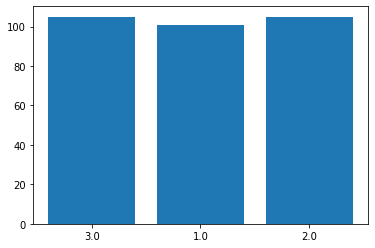

In [49]:
bl = Counter(spiral.values[:,-1])
print('Resampled dataset shape %s' % bl)
plt.bar([str(k) for k in bl.keys()],bl.values(),align='center')
plt.show()

Resampled dataset shape Counter({3.0: 105, 1.0: 105, 2.0: 105})


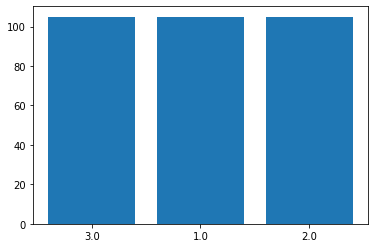

In [50]:
# ooversampling data
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(spiral.values[:,:-1],spiral.values[:,-1])
bl_os=Counter(Y)
print('Resampled dataset shape %s' % bl_os)
plt.bar([str(k) for k in bl_os.keys()],bl_os.values(),align='center')
plt.show()

In [51]:
# splittign the dataset
x_t,x_te,y_t,y_te = train_test_split(X,
                                     Y,
                                     test_size=0.33, 
                                     random_state=42)


# Naive Bayes

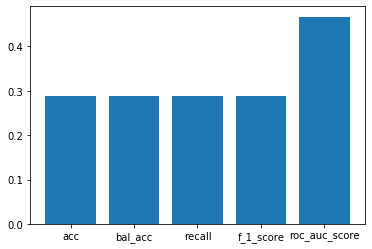

{'acc': 0.28846153846153844, 'bal_acc': 0.28846153846153844, 'recall': 0.28879551820728294, 'f_1_score': 0.28834449422684716, 'roc_auc_score': 0.46665448788210934}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.32      0.29      0.30        35
         3.0       0.27      0.26      0.26        35

    accuracy                           0.29       104
   macro avg       0.29      0.29      0.29       104
weighted avg       0.29      0.29      0.29       104



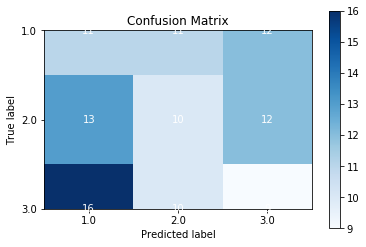

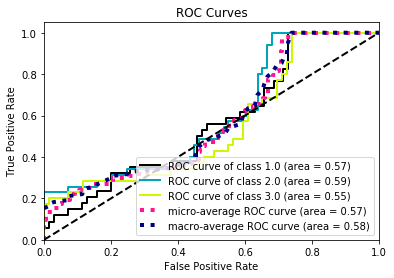

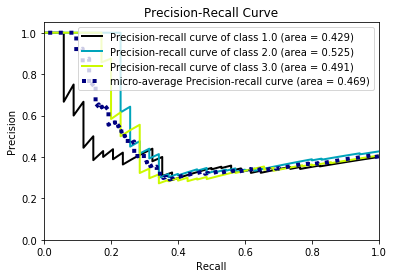

In [52]:
NB_model = GaussianNB()
# fitting the model
NB_model.fit(x_t,y_t)
#evaluating the model
r = results_report(NB_model,y_te)
print(r)
models['Naive Bayes']=r
y_pred = NB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(NB_model,y_te,x_te)

In [23]:
# KNN

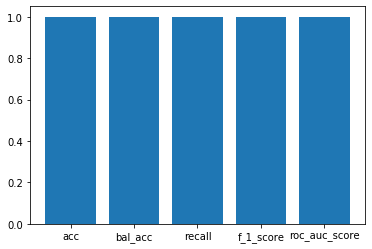

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        34
         2.0       1.00      1.00      1.00        35
         3.0       1.00      1.00      1.00        35

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



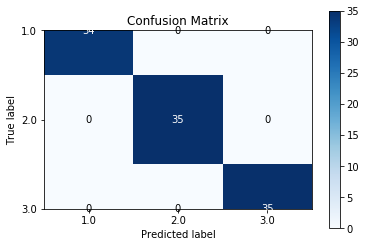

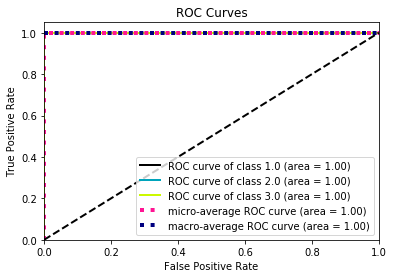

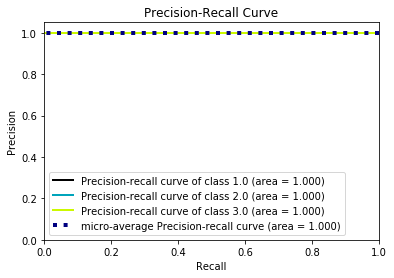

In [53]:
KNN_model = KNeighborsClassifier(n_neighbors)
KNN_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(KNN_model,y_te)
print(r)
models['KNN']=r
y_pred = KNN_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(KNN_model,y_te,x_te)

In [54]:
# LDA

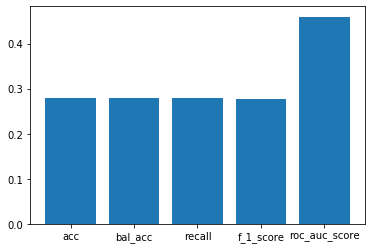

{'acc': 0.27884615384615385, 'bal_acc': 0.27884615384615385, 'recall': 0.2792717086834734, 'f_1_score': 0.2776705276705277, 'roc_auc_score': 0.4594771241830065}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.28      0.23      0.25        35
         3.0       0.29      0.29      0.29        35

    accuracy                           0.28       104
   macro avg       0.28      0.28      0.28       104
weighted avg       0.28      0.28      0.28       104



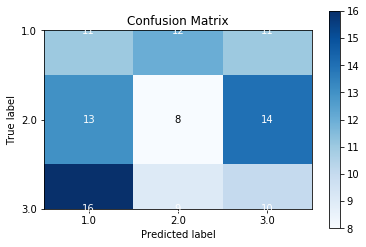

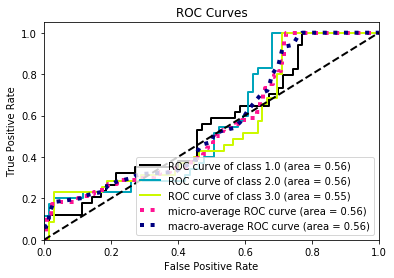

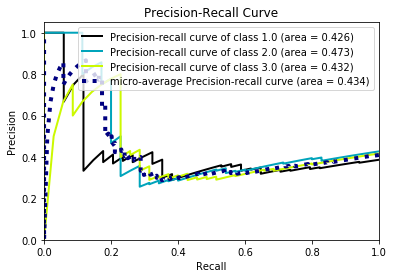

In [55]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LDA_model,y_te)
print(r)
models['LDA']=r
y_pred = LDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(LDA_model,y_te,x_te)

In [56]:
# QDA

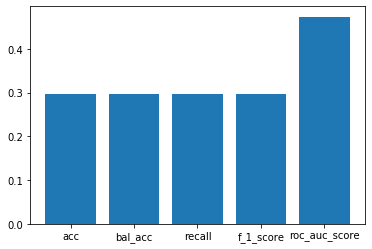

{'acc': 0.2980769230769231, 'bal_acc': 0.2980769230769231, 'recall': 0.2977591036414566, 'f_1_score': 0.2961205987771453, 'roc_auc_score': 0.4734137133114115}
              precision    recall  f1-score   support

         1.0       0.26      0.26      0.26        34
         2.0       0.33      0.26      0.29        35
         3.0       0.30      0.37      0.33        35

    accuracy                           0.30       104
   macro avg       0.30      0.30      0.30       104
weighted avg       0.30      0.30      0.30       104



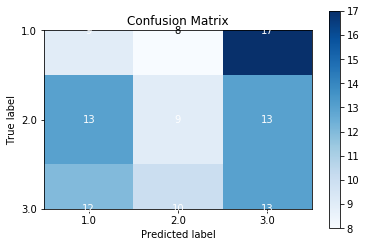

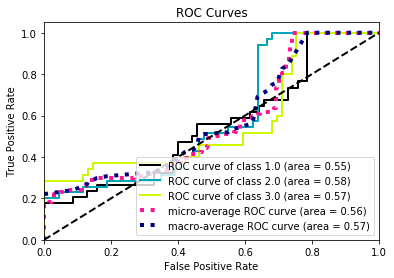

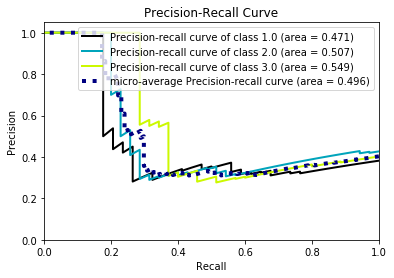

In [57]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(QDA_model,y_te)
print(r)
models['QDA']=r
y_pred = QDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(QDA_model,y_te,x_te)

In [58]:
#Linear SVM

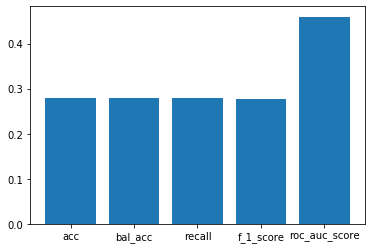

{'acc': 0.27884615384615385, 'bal_acc': 0.27884615384615385, 'recall': 0.2792717086834734, 'f_1_score': 0.2776705276705277, 'roc_auc_score': 0.4594771241830065}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.28      0.23      0.25        35
         3.0       0.29      0.29      0.29        35

    accuracy                           0.28       104
   macro avg       0.28      0.28      0.28       104
weighted avg       0.28      0.28      0.28       104



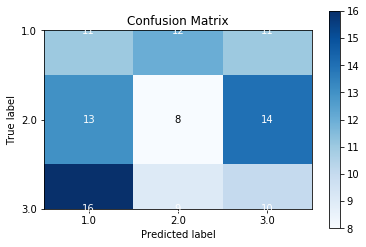

In [59]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LSVM_model,y_te)
print(r)
models['Linear SVM']=r
y_pred = LSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(LSVM_model,y_te,x_te)

In [33]:
# Non Linear SVM

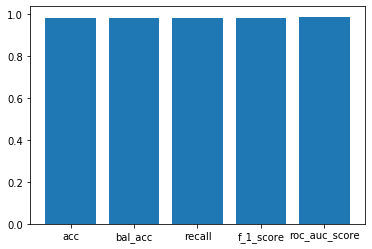

{'acc': 0.9807692307692307, 'bal_acc': 0.9807692307692307, 'recall': 0.980952380952381, 'f_1_score': 0.9806722689075631, 'roc_auc_score': 0.9857142857142858}
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        34
         2.0       1.00      0.94      0.97        35
         3.0       1.00      1.00      1.00        35

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



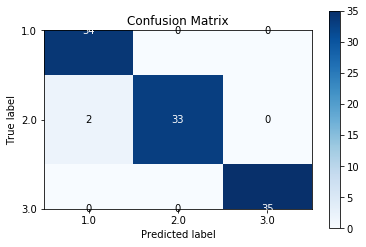

In [60]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(NLSVM_model,y_te)
print(r)
models['Non Linear SVM']=r
y_pred = NLSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(NLSVM_model,y_te,x_te)

In [61]:
# Logistic Regression

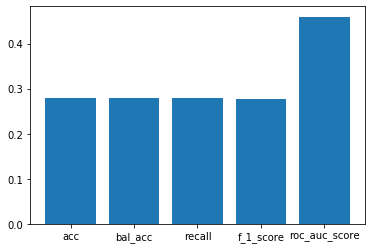

{'acc': 0.27884615384615385, 'bal_acc': 0.27884615384615385, 'recall': 0.2792717086834734, 'f_1_score': 0.2776518973702073, 'roc_auc_score': 0.4594771241830065}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.29      0.23      0.25        35
         3.0       0.28      0.29      0.28        35

    accuracy                           0.28       104
   macro avg       0.28      0.28      0.28       104
weighted avg       0.28      0.28      0.28       104



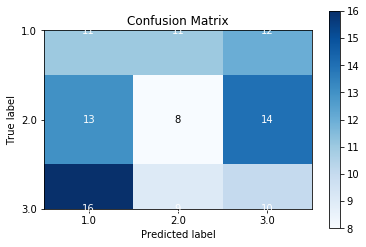

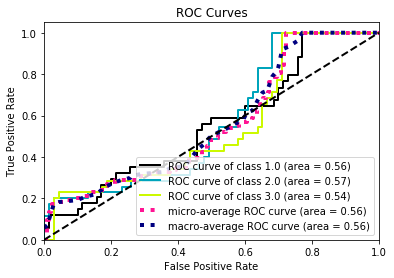

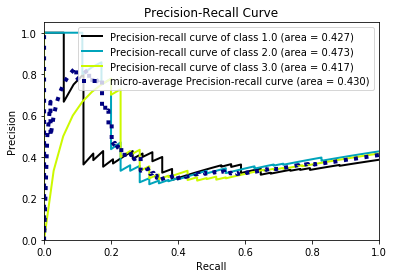

In [62]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LR_model,y_te)
print(r)
models['Logistic Regression']=r
y_pred = LR_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(LR_model,y_te,x_te)  

In [63]:
# Cart

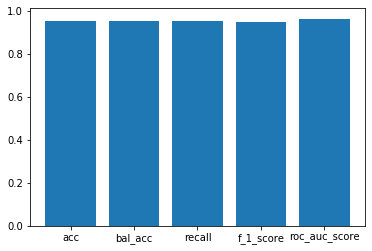

{'acc': 0.9519230769230769, 'bal_acc': 0.9519230769230769, 'recall': 0.9521008403361345, 'f_1_score': 0.9514911014911015, 'roc_auc_score': 0.964076645150814}
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94        34
         2.0       0.95      1.00      0.97        35
         3.0       1.00      0.89      0.94        35

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



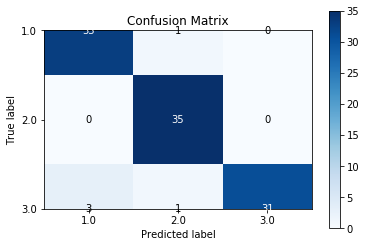

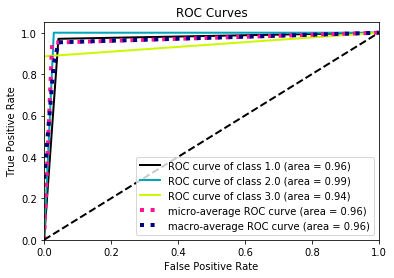

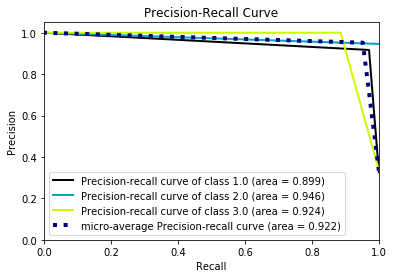

In [64]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(CART_model,y_te)
print(r)
models['CART']=r
y_pred = CART_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(CART_model,y_te,x_te)  

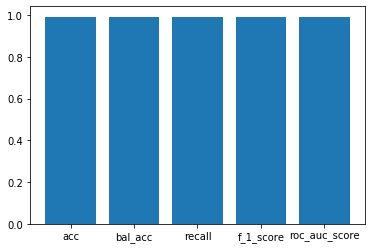

{'acc': 0.9903846153846154, 'bal_acc': 0.9903846153846154, 'recall': 0.9901960784313726, 'f_1_score': 0.9903300399411393, 'roc_auc_score': 0.9926825802784882}
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.99        34
         2.0       0.97      1.00      0.99        35
         3.0       1.00      1.00      1.00        35

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



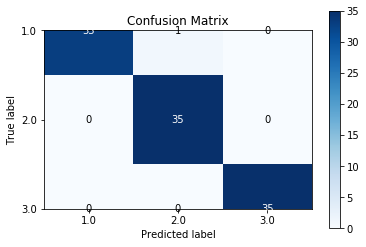

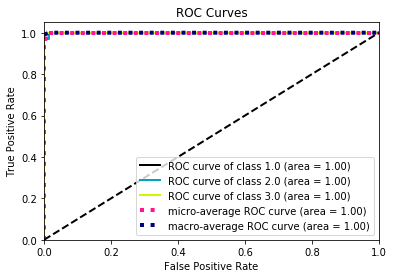

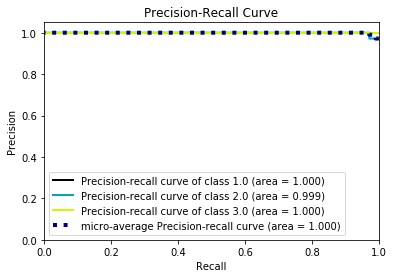

In [66]:
# Random forest
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(RF_model,y_te)
print(r)
models['Random Forest']=r
y_pred = RF_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(RF_model,y_te,x_te)

In [67]:
# Ada boost

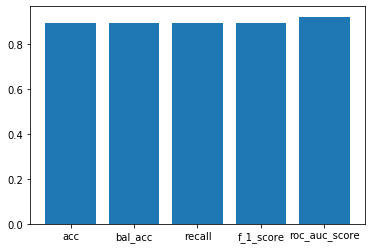

{'acc': 0.8942307692307693, 'bal_acc': 0.8942307692307693, 'recall': 0.8941176470588235, 'f_1_score': 0.8942461246592942, 'roc_auc_score': 0.9206613080014615}
              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87        34
         2.0       0.89      0.91      0.90        35
         3.0       0.94      0.89      0.91        35

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



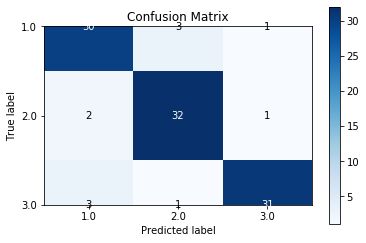

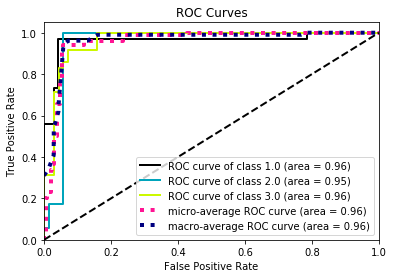

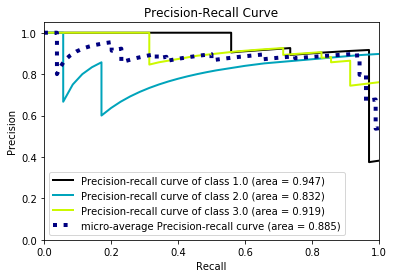

In [74]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(AB_model,y_te)
print(r)
models['AdaBoost']=r
y_pred = AB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

In [69]:
# Gradient boosting

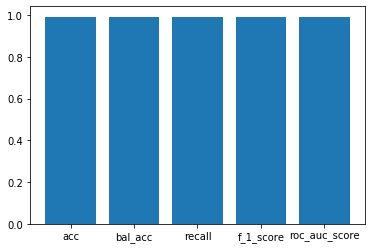

{'acc': 0.9903846153846154, 'bal_acc': 0.9903846153846154, 'recall': 0.9901960784313726, 'f_1_score': 0.9903300399411393, 'roc_auc_score': 0.9926825802784882}
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.99        34
         2.0       0.97      1.00      0.99        35
         3.0       1.00      1.00      1.00        35

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



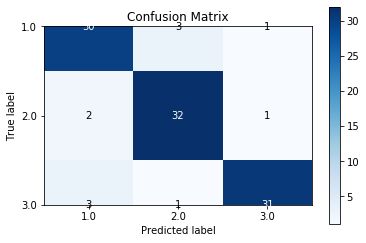

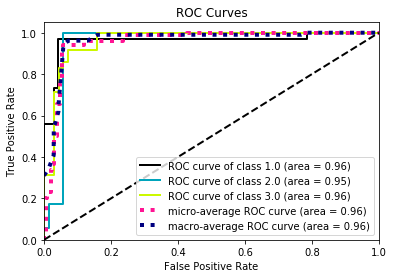

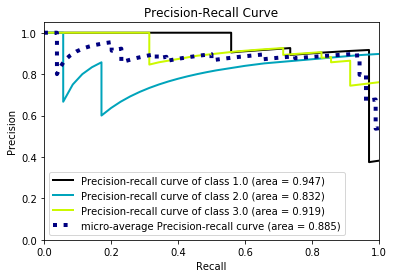

In [77]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(GB_model,y_te)
print(r)
models['GradBoost']=r
y_pred = GB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

In [78]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,0.990385,0.990385,0.990196,0.990330,0.992683
GradBoost,0.990385,0.990385,0.990196,0.990330,0.992683
Non Linear SVM,0.980769,0.980769,0.980952,0.980672,0.985714
CART,0.951923,0.951923,0.952101,0.951491,0.964077
AdaBoost,0.894231,0.894231,0.894118,0.894246,0.920661
QDA,0.298077,0.298077,0.297759,0.296121,0.473414
Naive Bayes,0.288462,0.288462,0.288796,0.288344,0.466654
LDA,0.278846,0.278846,0.279272,0.277671,0.459477
Linear SVM,0.278846,0.278846,0.279272,0.277671,0.459477
